<a href="https://colab.research.google.com/github/BlazeStorm001/bias-variance/blob/main/Bias_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias Variance Tradeoff
In Machine Learning Problems, the most challenging tasks is to find the right model that is well suited to the dataset. Most common dilemma that people face is:

Should I choose a simpler model and settle for less accuracy perhaps due to underfitting on the data?

Or a complex model must be choosen to ensure higher accuracy while increasing generalization error on newer data?

The **Bias Variance Tradeoff** comes into picture to answer this dilemma.

## Background
In regression, each label, $r^t$, corresponding to sample point $x^t$, is composed of two components, the noise $ϵ$, and the underlying function $f(x^t)$. Our goal is to estimate the underlying function using our own estimator function, $g(x^t;\theta)$, having some parameters $\theta$.

$$ r^t = f(x^t) + ϵ$$

Above equation represents the fact that for the same sample point we could have different labels due to the noise. For example, suppose we are trying to do a scientific experiment, for the same scientific parameter (same sample point) we can get different results due to various uncertainities such as measurement errors, temperature and other physical conditions.

Now, in order to evaluate how well our estimator $g(x^t; \theta)$ is fit on the data we can find out average value/expectation of the squared difference between the estimator and the label over all possible $r$ values:

$$ E\big[(r - g(x))^2 \mid x\big] = \underbrace{E\big[(r - E[r \mid x])^2 \mid x\big]}_{\text{noise}} + \underbrace{\big(E[r \mid x] - g(x)\big)^2}_{\text{squared error}} $$

Above equation gives us an idea of how well the estimator is doing for a given sample point. We would want the value $E\big[(r - g(x))^2 \mid x\big]$ as less as possible. Notice that the first term in the equation has no relation with $g(x)$, thus we don't have any control over it, although the second term in the equation can be tuned.

The second term can be broken down into by subtracting and adding $E_x[g(x)]$:

\begin{equation}
E_x\big[(E[r \mid x] - g(x))^2 \mid x\big] = \underbrace{\big(E[r \mid x] - E_x[g(x)]\big)^2}_{\text{bias}} + \underbrace{E_x\big[(g(x) - E_x[g(x)])^2\big]}_{\text{variance}}
\end{equation}

The first term is called the bias of the model which is the squared difference between the estimated true label ($E[r \mid x]$) and the average/expected value of all the predictions done by the different estimators $g(x)$ fit on the different samples $X$ drawn from the dataset for a particular sample point.

The second term is the variance of the model which represents the statistical variance of all the predictions done by different estimators for a particular sample point.

## Methodology
1. A dataset is created by adding gaussian error to sine wave:
$$ f(x^t) = A\sin(\frac{2\pi}{T}\cdot x^t) + c$$
$$ r(x^t) = f(x^t) + \epsilon$$
2. From the universal dataset created of size $N$, draw $S$ number of sample datasets of fixed size.
3. Fit polynomials of different order $i$ ,on each drawn sample, $s$ namely $g_{is}(x^{t})$. This is our estimator.
4. Find out the best degree model according to the validation error obtained through cross validation.
5. Find out the bias on the overall dataset for each degree $i$:
$$ bias_i^2 = \frac{1}{\text{N}}\cdot \sum_{t} (f(x^t) - \frac{1}{\text{S}}\cdot \sum_{s}g_{is} )^2 $$
6. Find out the variance on the overall dataset for each degree $i$:
$$variance_i = \frac{1}{N\cdot S} \sum_{t} \sum_{s}(g_{is}(x^t) - \frac{1}{\text{S}}\cdot \sum_{s}g_{is}(x^t) )^2 $$
7. Find out the degree where the total error is minimum. This is the best model according to the bias variance tradeoff.
$$ \text{Total error} = Bias^2 + variance $$


## Results
According to both the total error and cross validation error, we can observe that according to both the methods the best model has the same degree. Thus validation error is a good estimate to the total error (which in most cases is not computable) and can be used to find out the best model.




# PARAMETERS

In [196]:
from math import sin, pi
import numpy as np

TOTAL_INSTANCES = 10_000

# Parameters of the trig function
PERIOD = 5000
AMPLITUDE = 10
VERTICAL_SHIFT = 20
# Variance of the error
ERROR_VARIANCE = 5
# No. of folds for Cross Validation
FOLDS = 10
# No. of Samples for calculating bias variance
SAMPLES = 10
# Size of the sample drawn for bias and variance calculation
SAMPLE_SIZE = 100
# max degree of polynomial to be fit
MAX_DEGREE = 10

def base_func(x):
    return AMPLITUDE * sin(x * 2 * pi / PERIOD) + VERTICAL_SHIFT
# def base_func(x):
#     return 2*x + 1

# Generate the Dataset
---

In [197]:
indexes = range(TOTAL_INSTANCES)
indexes[:20]

range(0, 20)

In [198]:
raw_instances = [ base_func(x) for x in indexes ]
raw_instances[:20]

[20.0,
 20.012566367307024,
 20.025132714770038,
 20.037699022545063,
 20.050265270788188,
 20.06283143965559,
 20.07539750930357,
 20.087963459888595,
 20.100529271567307,
 20.11309492449658,
 20.125660398833524,
 20.13822567473555,
 20.15079073236037,
 20.16335555186604,
 20.175920113410996,
 20.18848439715408,
 20.201048383254577,
 20.21361205187223,
 20.2261753831673,
 20.238738357300562]

In [199]:
import matplotlib.pyplot as plt

## All Raw 10,000 Instances
---

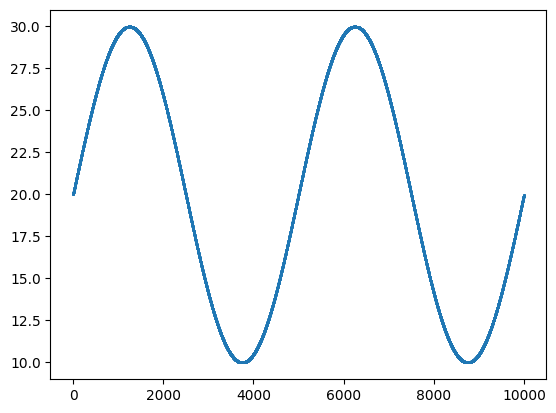

In [200]:
plt.scatter(indexes, raw_instances, s= 1)

In [201]:
errors = np.random.normal(0, np.sqrt(ERROR_VARIANCE), TOTAL_INSTANCES)
errors

array([-2.78024816, -1.21272245, -0.270177  , ...,  5.71654752,
        0.50415101, -0.24578191])

In [202]:
dataset = errors + raw_instances

In [203]:
import pandas as pd
dic = {
    'x': indexes,
    'y': dataset
}
df = pd.DataFrame(dic)


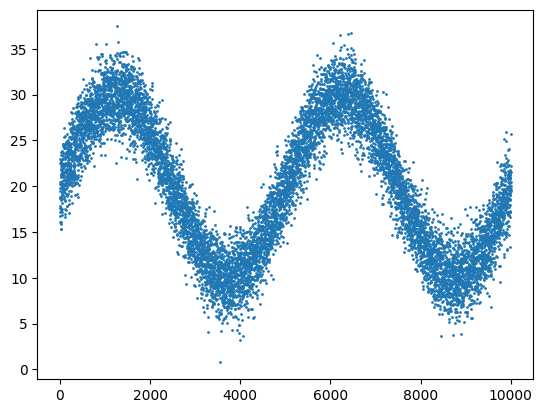

In [204]:
plt.scatter(indexes, dataset, s= 1)

# Sampling for Determining Bias And Variance

In [205]:
import pandas as pd
import random

def get_samples(df, sample_size, num_samples, init_random_state):
  random_samples = list()
  for i in range(num_samples):
    random_sample = df.sample(sample_size, random_state=i + init_random_state)
    random_samples.append(random_sample)
  return random_samples


ALL_SAMPLES = get_samples(df, SAMPLE_SIZE, SAMPLES, 0)
ALL_SAMPLES

[         x          y
 9394  9394  10.496673
 898    898  29.321784
 2398  2398  17.871463
 5906  5906  23.658215
 2343  2343  20.926984
 ...    ...        ...
 4595  4595  14.200692
 3725  3725  10.142035
 6450  6450  27.849022
 6846  6846  22.711123
 3891  3891  10.270289
 
 [100 rows x 2 columns],
          x          y
 9953  9953  19.570520
 3850  3850  10.650111
 4962  4962  16.603148
 3886  3886  11.598049
 5437  5437  23.452961
 ...    ...        ...
 4699  4699  17.792868
 3057  3057  14.574767
 1185  1185  28.472213
 3207  3207   9.249648
 9462  9462  15.772028
 
 [100 rows x 2 columns],
          x          y
 7878  7878  19.245808
 3224  3224  12.149563
 1919  1919  25.897967
 4432  4432  13.277657
 4835  4835  20.136030
 ...    ...        ...
 8223  8223  13.145689
 7145  7145  24.660289
 7062  7062  22.441327
 6329  6329  26.895118
 6632  6632  31.364207
 
 [100 rows x 2 columns],
          x          y
 5876  5876  26.258204
 6555  6555  23.444342
 1448  1448  27.997573

In [206]:
# draws random sample of size SAMPLE_SIZE from df
# fits a polynomial from lower_degree to upper_degree on each of the sample
# returns the list AllModels of shape AllModels[degree][sample][coefficient]

def getAllModels(samples, lower_degree, upper_degree):
  AllModels = list()
  # Perform sampling instead of cross validation we are taking random samples from data and fitting polynomial
  # of same order on different samples
  for i in range(lower_degree,upper_degree + 1):
    currentPolyModels = list()
    for sample in samples:
        model = np.polyfit(sample['x'], sample['y'], i)
        currentPolyModels.append(model)
        # print(random_sample)

    AllModels.append(currentPolyModels)

  return AllModels

ALL_MODELS = getAllModels(ALL_SAMPLES, 1, MAX_DEGREE)
ALL_MODELS

[[array([-8.97496299e-04,  2.36832018e+01]),
  array([-8.81867476e-04,  2.41155641e+01]),
  array([-1.12989178e-03,  2.59078877e+01]),
  array([-7.09036482e-04,  2.38722629e+01]),
  array([-1.22350556e-03,  2.63884327e+01]),
  array([-9.25342936e-04,  2.39643542e+01]),
  array([-1.39100859e-03,  2.64642547e+01]),
  array([-9.19040420e-04,  2.35070549e+01]),
  array([-1.02431049e-03,  2.47006111e+01]),
  array([-7.17520884e-04,  2.23594357e+01])],
 [array([ 3.06377814e-08, -1.20355834e-03,  2.42459696e+01]),
  array([ 1.02903973e-07, -1.91187744e-03,  2.58393705e+01]),
  array([-1.59977657e-08, -9.79523968e-04,  2.56889163e+01]),
  array([ 9.07601353e-08, -1.58386215e-03,  2.53006332e+01]),
  array([-3.76648673e-08, -8.55340234e-04,  2.58026040e+01]),
  array([-3.40659238e-08, -5.88864696e-04,  2.33956512e+01]),
  array([ 5.73202822e-08, -1.96289931e-03,  2.74065229e+01]),
  array([ 1.17292390e-07, -2.02212964e-03,  2.52201693e+01]),
  array([-5.40242468e-08, -5.05084778e-04,  2.3924210

In [207]:
# Returns the list of predictions for a particular polynomial given the set of inputs x
def getPrediction(x, coefficients):
  polynomial_curve = [ sum([ coeff_i * x_term ** i for i, coeff_i in enumerate(coefficients[::-1]) ]) for x_term in x ]
  return polynomial_curve

# Cross Validation to Determine Validation and Training Error

In [208]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import metrics

# perfoms cv on the samples drawn to get validation and train errors for each degree
# returns: train and validation errors for train and val sets, output shape: [sample][degree][error]
def get_cv_errors(samples, folds, lower_degree, upper_degree):

  samples_val_mae = []
  samples_val_mse = []
  samples_train_mae = []
  samples_train_mse = []

  for sample in samples:

    X = sample['x']
    y = sample['y']

    all_val_mae = []
    all_val_mse = []
    all_train_mae = []
    all_train_mse = []

    # Perform cross-validation
    for i in range(lower_degree, upper_degree + 1):
      # currentPolyTestModels = list()
      # currentPolyTrainModels = list()
      val_mae = []
      val_mse = []
      train_mae = []
      train_mse = []
      kf = KFold(n_splits=folds, shuffle=True, random_state=42)
      for train_index, test_index in kf.split(X):
          X_train, X_test = X.iloc[train_index], X.iloc[test_index]
          y_train, y_test = y.iloc[train_index], y.iloc[test_index]
          # print(train_index)
          # For calculating bias and variance we use test set because a smaller set is need to fit the poly.
          # modelTest = np.polyfit(X_test,y_test,i)
          # currentPolyTestModels.append(modelTest)
          modelTrain = np.polyfit(X_train,y_train,i)
          # currentPolyTrainModels.append(modelTrain)

          # gets the prediction for test set and computes errors
          predictions = getPrediction(X_test, modelTrain)
          val_mae.append(metrics.mean_absolute_error(y_test,predictions))
          val_mse.append(metrics.mean_squared_error(y_test,predictions))

          # gets the prediction for training set and computes errors
          predictions = getPrediction(X_train, modelTrain)
          train_mae.append(metrics.mean_absolute_error(y_train,predictions))
          train_mse.append(metrics.mean_squared_error(y_train,predictions))
          # Train and test your model using X_train, y_train, X_test, y_test respectively
          # ...

          # print("Train data:")
          # print(X_train)
          # print(y_train)
          # print("Test data:")
          # print(X_test)
          # print(y_test)
          # print("-" * 20)
      # AllModels.append(currentPolyTestModels)
      all_val_mae.append(val_mae)
      all_val_mse.append(val_mse)
      all_train_mae.append(train_mae)
      all_train_mse.append(train_mse)

    samples_val_mae.append(all_val_mae)
    samples_val_mse.append(all_val_mse)
    samples_train_mae.append(all_train_mae)
    samples_train_mse.append(all_train_mse)

  return samples_val_mae, samples_val_mse, samples_train_mae, samples_train_mse

# get the models and train, val errors for all degrees
samples_val_mae, samples_val_mse, samples_train_mae, samples_train_mse = get_cv_errors(ALL_SAMPLES, FOLDS, 1, MAX_DEGREE)


# Optimal Degree Model According to Validation Error

In [209]:
# find the average error for each degree across all the samples, then find the average for each degree
mean_val_mae = np.mean(np.mean(samples_val_mae, axis=0), axis = 1)
mean_val_mse = np.mean(np.mean(samples_val_mse, axis=0), axis = 1)
mean_train_mae = np.mean(np.mean(samples_train_mae, axis=0), axis = 1)
mean_train_mse = np.mean(np.mean(samples_train_mse, axis=0), axis = 1)
# Find the degree with the minimum mean absolute error
degree_with_min_mae = np.argmin(mean_val_mae) + 1
min_mae = np.min(mean_val_mae)

# Find the degree with the minimum mean squared error
degree_with_min_mse = np.argmin(mean_val_mse) + 1
min_mse = np.min(mean_val_mse)

# Print the results
print("Model of degree:", degree_with_min_mae, "with minimum mean absolute error as:", min_mae)
print("Model of degree:", degree_with_min_mse, "with minimum mean squared error as:", min_mse)


Model of degree: 7 with minimum mean absolute error as: 1.8214999320435346
Model of degree: 7 with minimum mean squared error as: 5.339128316649342


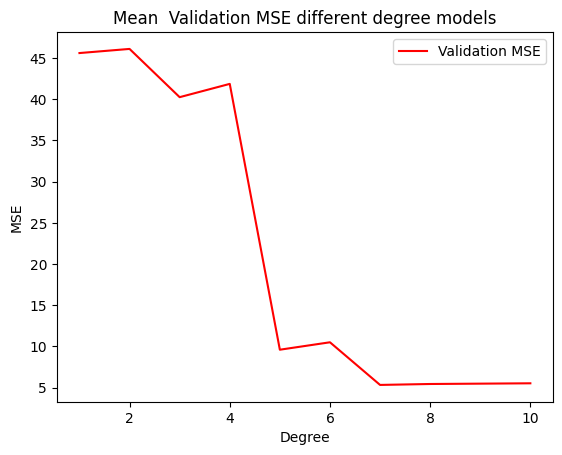

In [210]:
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Mean  Validation MSE different degree models')
plt.plot(range(1,MAX_DEGREE + 1), np.mean(np.mean(samples_val_mse, axis=0), axis = 1), label='Validation MSE', color='red')
plt.legend()

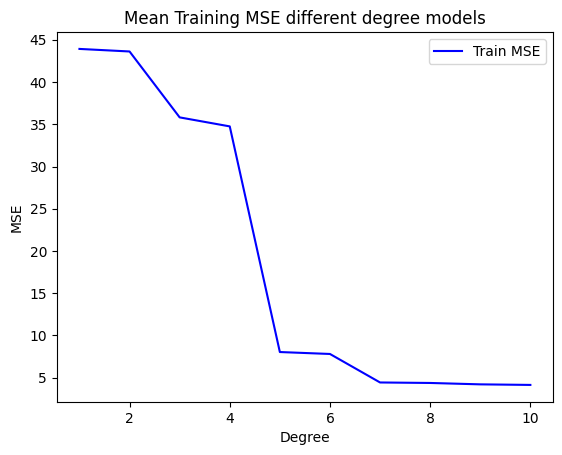

In [211]:
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Mean Training MSE different degree models')
plt.plot(range(1,MAX_DEGREE + 1), mean_train_mse, label='Train MSE', color='blue')
plt.legend()

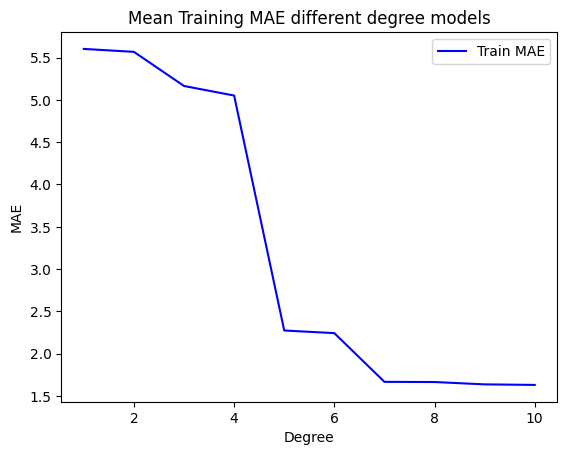

In [212]:
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.title('Mean Training MAE different degree models')
plt.plot(range(1,MAX_DEGREE + 1), mean_train_mae, label='Train MAE', color='blue')
plt.legend()

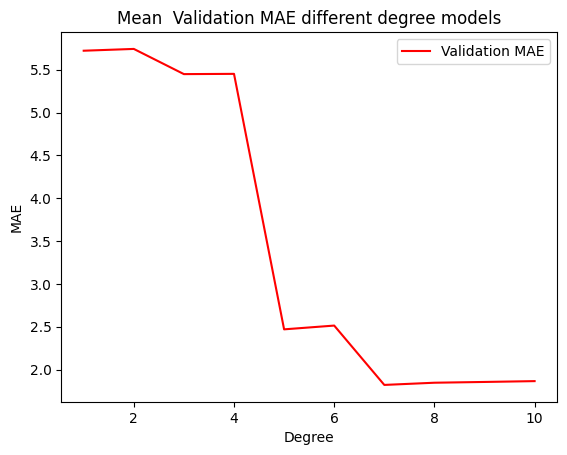

In [213]:
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.title('Mean  Validation MAE different degree models')
plt.plot(range(1,MAX_DEGREE + 1), mean_val_mae, label='Validation MAE', color='red')
plt.legend()

# Plot Polynomial Fit on Different Samples

In [214]:
# Get the prediction of all folds for a particular degree poly
def findPredsForModel(X,Models, index = 1):
  AllPredictions  = list()
  for sample in range(SAMPLES):
    prediction = getPrediction(X, Models[index][sample])
    AllPredictions.append(prediction)
  return AllPredictions


In [215]:
# plot the prediction for varies folds and average prediction for particular degree
# takes array of the form preds[sample][prediction]
def drawPredsForModel(degree, preds):
  # ax.clear()
  # Add labels and title
  plt.figure(figsize=(10, 10))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(f'Different Models for Degree {degree} Polynomial')

  # Display the plot
  plt.scatter(indexes, dataset, s= 1)
  for i in range(SAMPLES):
    plt.plot(indexes, preds[i], label=f'Prediction for Sample {i + 1}')

  plt.plot(indexes, np.mean(preds, axis=0), label=f'Average Prediction')
  # plt.plot(X, preds[0], label=f'Average Prediction')
  # Add legend
  plt.legend()
  plt.savefig(f'/content/degree{degree}.png')

  # plt.draw()






Find Bias Variance Across Different Degree of Polynomial

In [216]:
# find the predictions for all the coefficients in Model array
# also find the average of all the predictions across all the samples (located in AvgPred)
def getPreds(X, Models):
  AvgPreds = list()
  Preds = list()
  for i in range(len(Models)):
    preds = findPredsForModel(X,Models, i)
    avgPred = np.mean(preds, axis=0)
    Preds.append(preds)
    AvgPreds.append(avgPred)
  return Preds, AvgPreds

Preds_Full, AvgPreds_Full = getPreds(indexes, ALL_MODELS)

In [217]:
# find the bias for all the models
# when size of AvgPreds is 1 then it will find the bias for only one degree
def getBiasSquared(X,AvgPreds):
  # print(X)
  AllBias = list()
  for degree in range(len(AvgPreds)):
    bias = 0
    for x in X:
      # print
      bias += (raw_instances[x] - AvgPreds[degree][x])**2
      # print(bias)

    bias = bias/len(X)
    AllBias.append(bias)
  return AllBias

Bias_Full = getBiasSquared(indexes, AvgPreds_Full)
Bias_Full

[42.57730826173767,
 42.61612068568864,
 35.865863864631244,
 36.46719428306425,
 4.8248836349805835,
 4.981780005292834,
 0.23052652028124834,
 0.22391624654684125,
 0.10722500395916534,
 0.14524876080063007]

In [218]:
def getVariance(X,AllPreds, AvgPreds):
  AllVariance = list()
  for degree in range(len(AllPreds)):
    variance = 0
    for j in range(len(X)):
      for sample in range(SAMPLES):
        variance += (AllPreds[degree][sample][j] - AvgPreds[degree][j])**2
        # print(variance)
      # variance = variance/FOLDS

    variance = variance/(len(X)*SAMPLES)
    AllVariance.append(variance)

  return np.array(AllVariance)

Variance_Full = getVariance(indexes, Preds_Full, AvgPreds_Full)
Variance_Full

array([0.63064737, 0.86003258, 2.35013084, 3.14831886, 1.56511242,
       1.80308674, 0.48114803, 0.52963449, 0.93697684, 1.32714117])

In [219]:
TotalError_Full = Bias_Full + Variance_Full
TotalError_Full

array([43.20795563, 43.47615326, 38.2159947 , 39.61551315,  6.38999605,
        6.78486675,  0.71167455,  0.75355073,  1.04420185,  1.47238993])

## Bias Variance Plot for Different Degrees


*   We can observe that as the model complexity/degree of polynomial increases the variances rises and bias decrease.
*   The total error first decreases, reaches a minima and then increases due to increase in variance.
* This is known as the bias variance tradeoff.








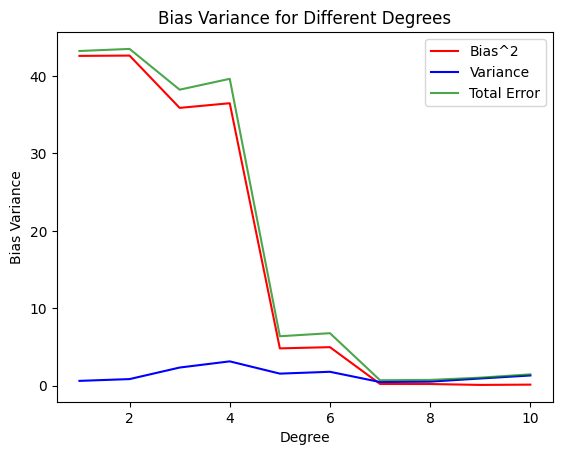

In [220]:
plt.xlabel('Degree')
plt.ylabel('Bias Variance')
plt.title('Bias Variance for Different Degrees')
plt.plot(range(1,MAX_DEGREE + 1), Bias_Full, label='Bias^2', color='red')
plt.plot(range(1,MAX_DEGREE + 1), Variance_Full, label='Variance', color='blue')
plt.plot(range(1,MAX_DEGREE + 1), TotalError_Full, label='Total Error',color ='green', alpha=0.7)
plt.legend()

In above plot we can observe that the $bias^2$ and $variance$ plots intersect at approximately degree = 7

## Log Bias Variance Plot For Better Visualization

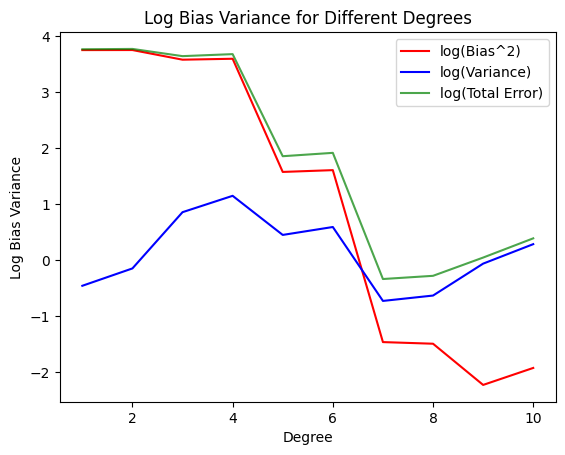

In [221]:
from math import log
plt.xlabel('Degree')
plt.ylabel('Log Bias Variance')
plt.title('Log Bias Variance for Different Degrees')
plt.plot(range(1,MAX_DEGREE + 1), [log(b) for b in Bias_Full], label='log(Bias^2)', color='red')
plt.plot(range(1,MAX_DEGREE + 1), [log(v) for v in Variance_Full], label='log(Variance)', color='blue')
plt.plot(range(1,MAX_DEGREE + 1), [log(e) for e in TotalError_Full], label='log(Total Error)',color ='green', alpha=0.7)
plt.legend()

In [222]:
optimal_degree = np.argmin(TotalError_Full) + 1
print(" Model of degree : ", optimal_degree, " with total error as : ",TotalError_Full[optimal_degree - 1])

 Model of degree :  7  with total error as :  0.7116745485215357


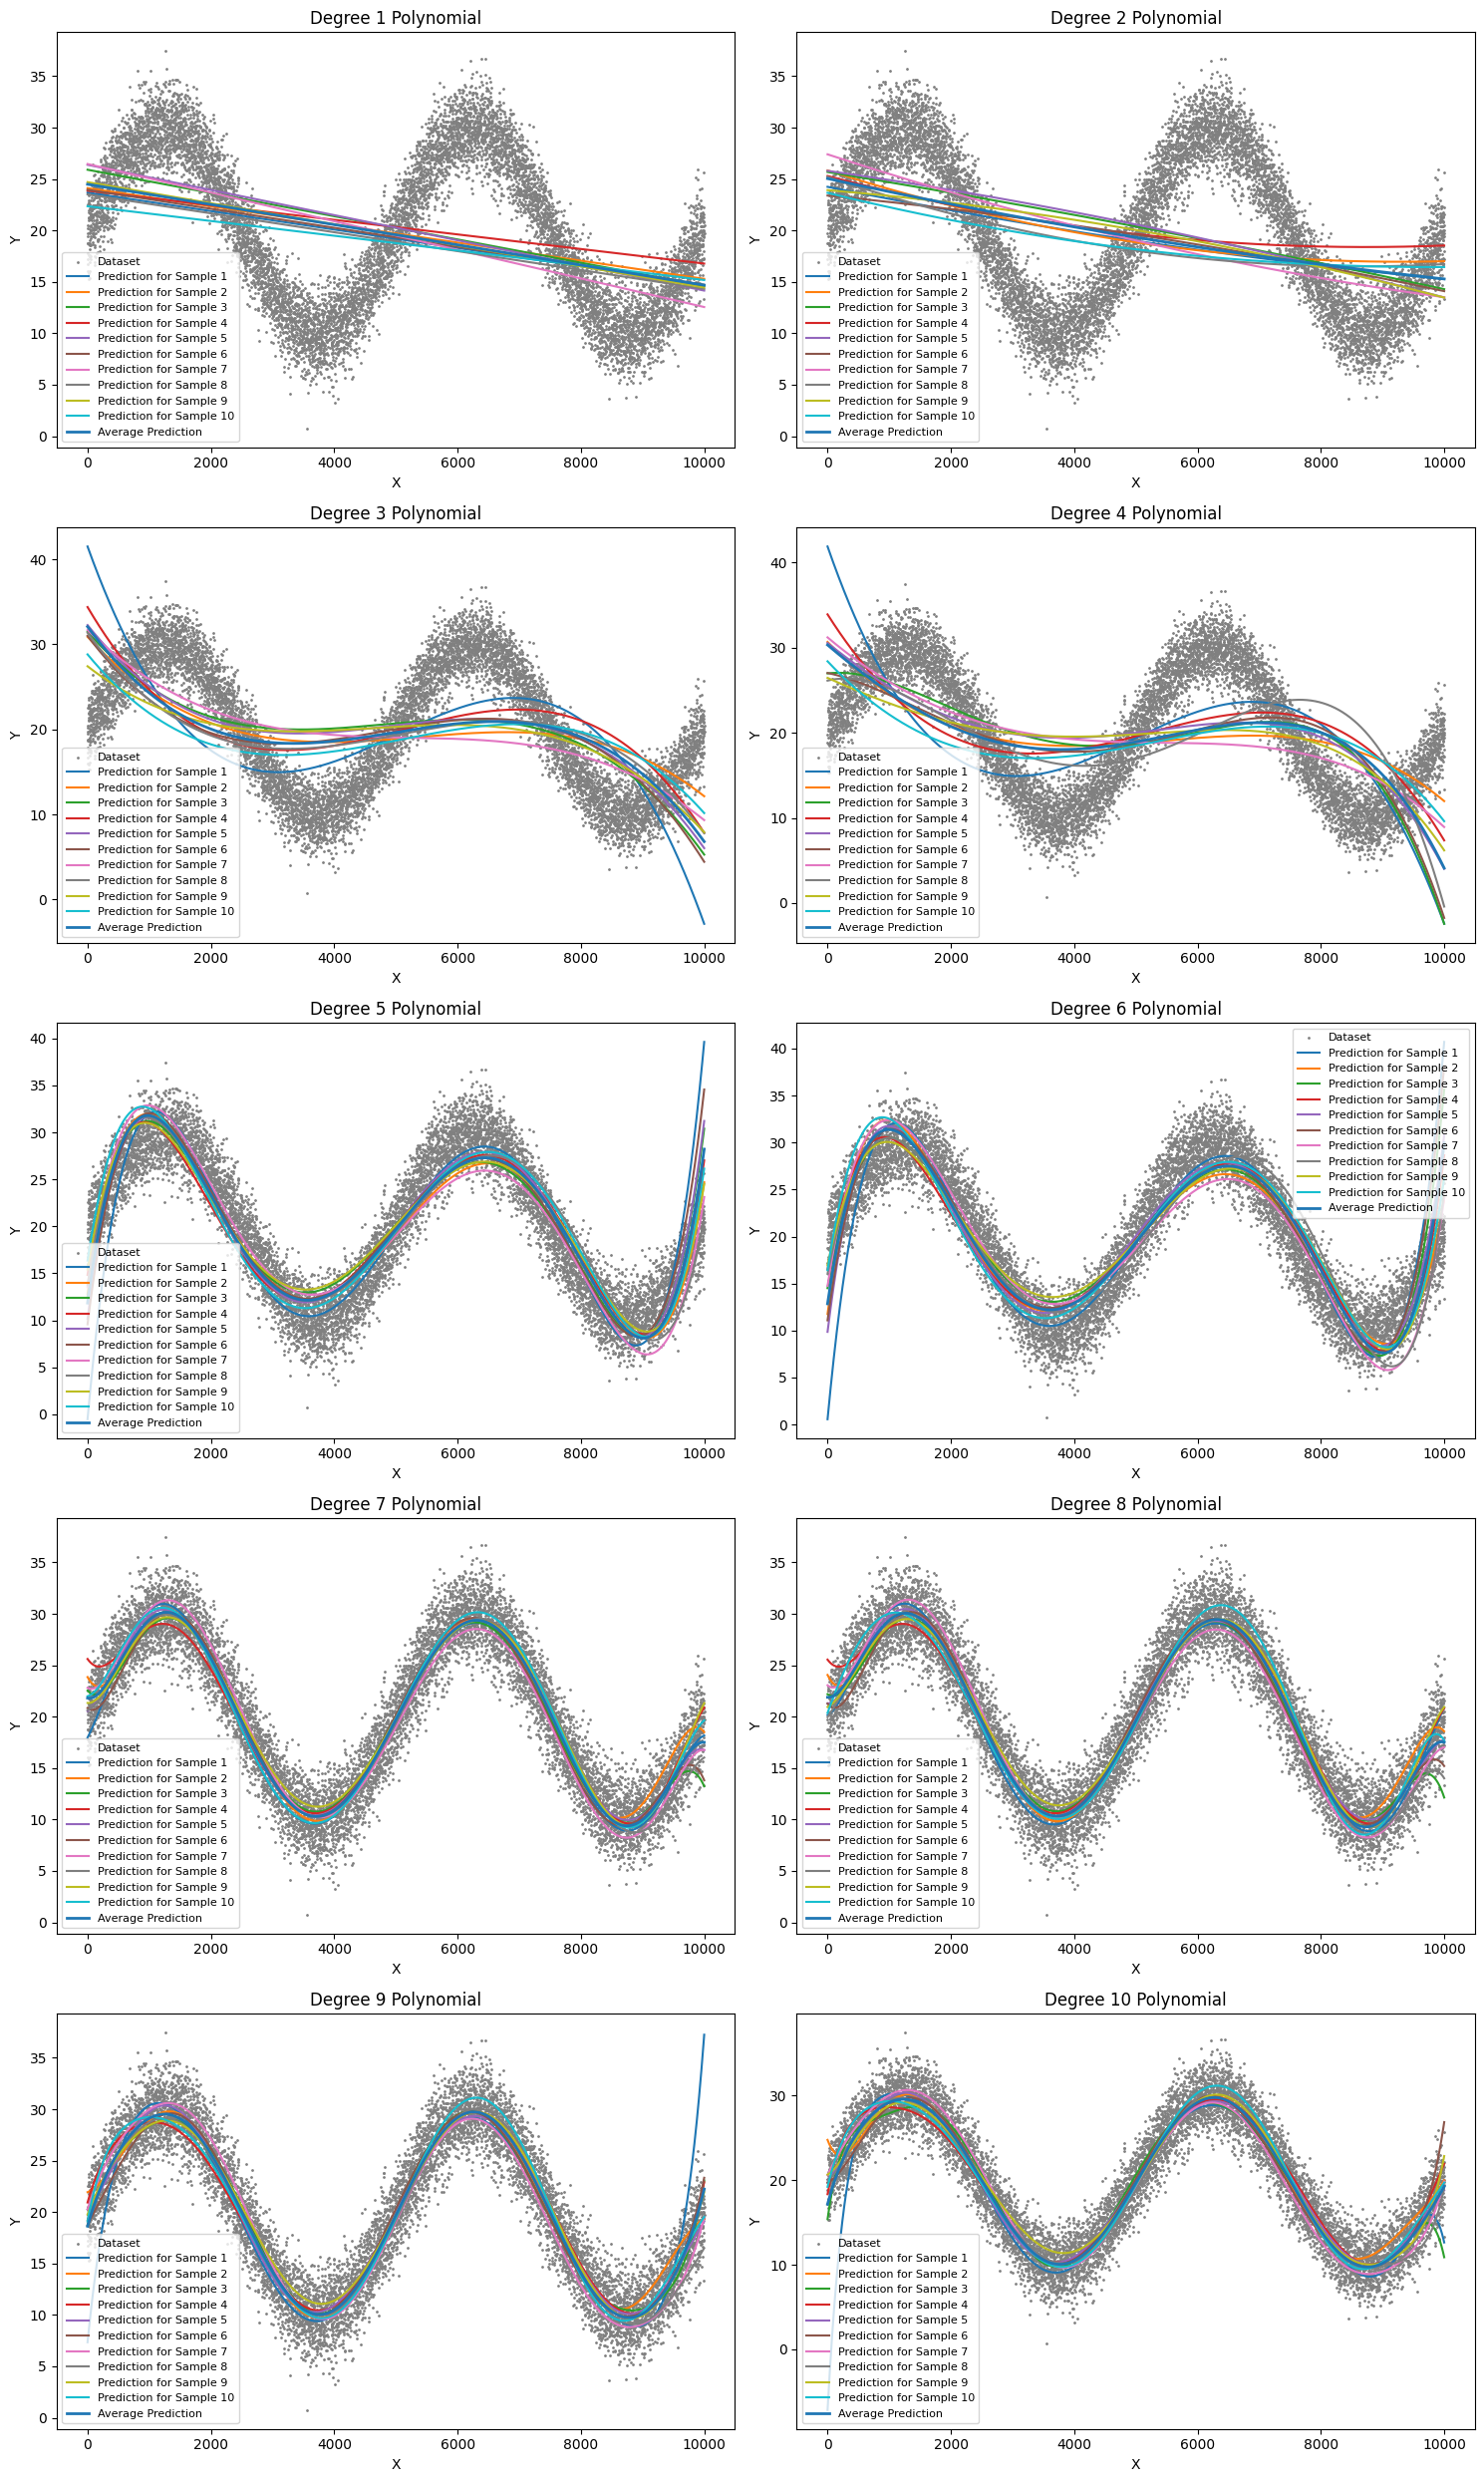

In [223]:
import matplotlib.pyplot as plt
import numpy as np

# Function to draw predictions for a specific degree
def drawPredsForModel(ax, degree, preds, indexes, dataset):
    ax.scatter(indexes, dataset, s=1, label='Dataset', color="gray")
    for i in range(SAMPLES):
        ax.plot(indexes, preds[i], label=f'Prediction for Sample {i + 1}')
    ax.plot(indexes, np.mean(preds, axis=0), label='Average Prediction', linewidth=2)
    ax.set_title(f'Degree {degree} Polynomial', fontsize=12)
    ax.set_xlabel('X', fontsize=10)
    ax.set_ylabel('Y', fontsize=10)
    ax.legend(fontsize=8)

# Grid layout parameters
rows = (MAX_DEGREE + 1) // 2  # 2 plots per row
cols = 2

# Create a figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten axes for easier indexing

# Loop through each degree and plot
for i in range(MAX_DEGREE):
    drawPredsForModel(axes[i], i + 1, Preds_Full[i], indexes, dataset)

# Hide unused subplots (if MAX_DEGREE is odd)
for j in range(MAX_DEGREE, len(axes)):
    axes[j].axis('off')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('/content/all_degrees.png')
plt.show()


# TODO: Showcase bias variance tradeoff for different sample sizes.